In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

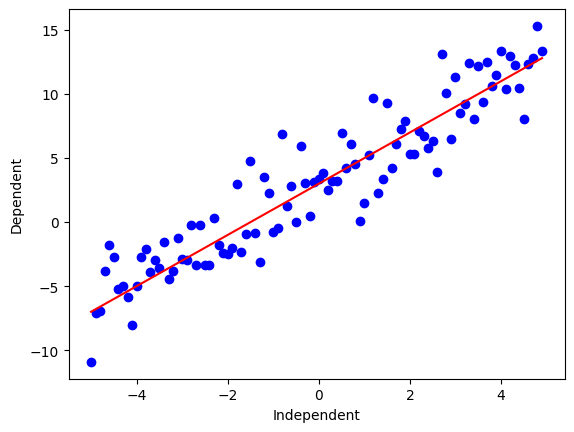

In [2]:
x = np.arange(-5.0, 5.0, 0.1)
y = 2 * (x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, '-r')
plt.ylabel('Dependent')
plt.xlabel('Independent')
plt.show()

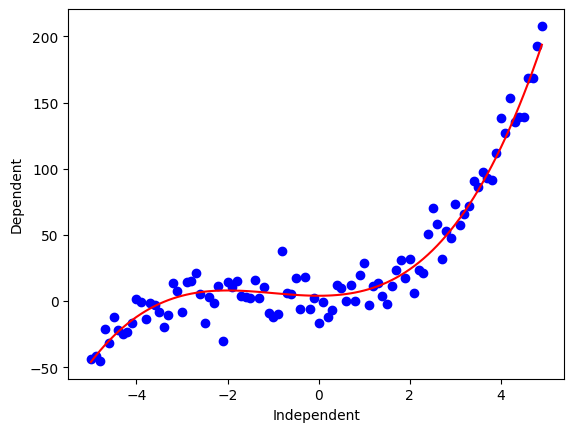

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
y = (x**3) + 3 * (x**2) + 4
y_noise = 12 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, '-r')
plt.ylabel('Dependent')
plt.xlabel('Independent')
plt.show()

C:\Users\Radin\AppData\Local\Temp\ipykernel_3672\3768810856.py:2: RuntimeWarning: invalid value encountered in log2
  y = np.log2(x) + 3


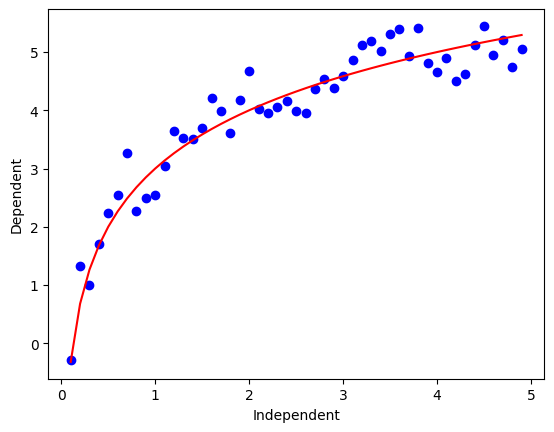

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.log2(x) + 3
y_noise = np.random.normal(size=x.size) / 3
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, '-r')
plt.ylabel('Dependent')
plt.xlabel('Independent')
plt.show()

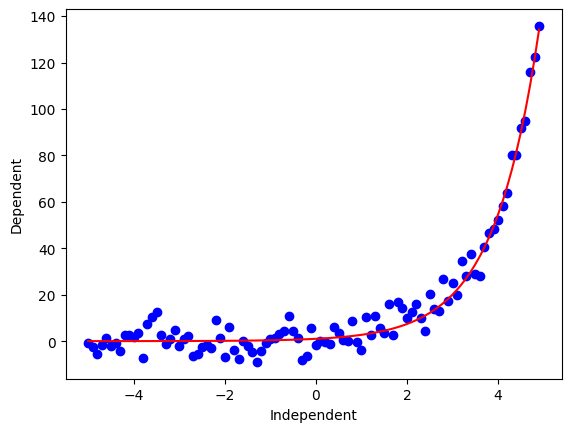

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x)
y_noise = 5 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, '-r')
plt.ylabel('Dependent')
plt.xlabel('Independent')
plt.show()

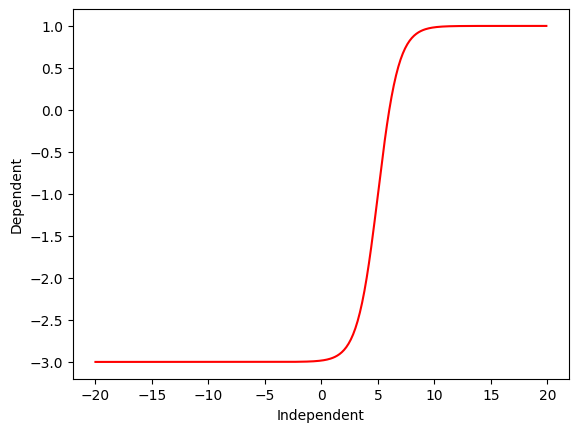

In [6]:
x = np.arange(-20.0, 20.0, 0.1)
y = 1 - 4/ (1 + np.power(3, x-5))
plt.plot(x, y, '-r')
plt.ylabel('Dependent')
plt.xlabel('Independent')
plt.show()

In [8]:
df = pd.read_csv('../data/china_gdp.csv')
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


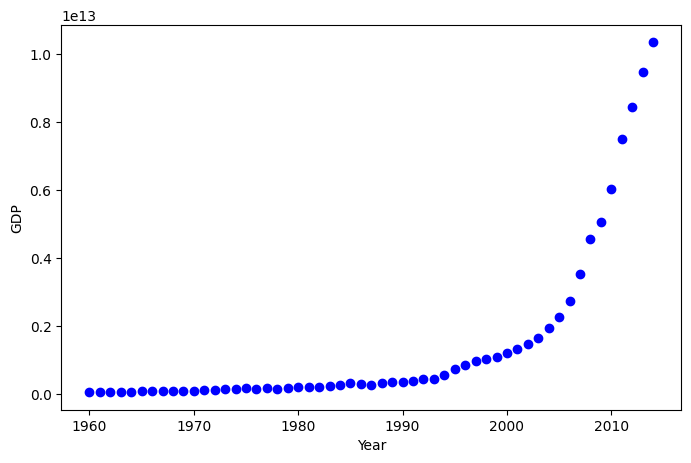

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(df.Year, df.Value, 'bo')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

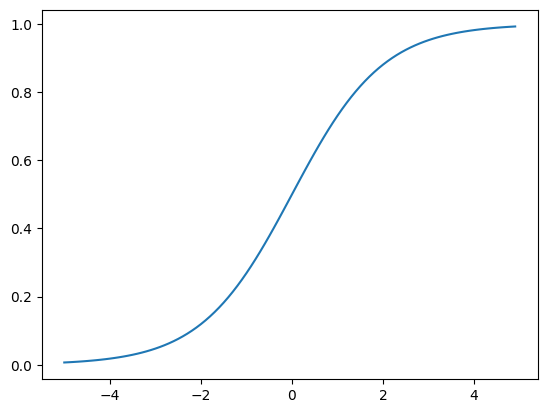

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1 / (1 + np.exp(-x))
plt.plot(x, y)
plt.show()

# Build the model

In [11]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1 *(x-Beta_2)))
    return y

if we write the model and play with beta with ourselves:

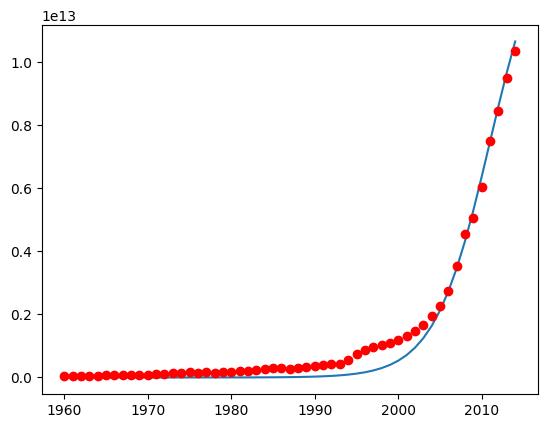

In [12]:
b1 = 0.3
b2 = 2011
x = df['Year']
y_pred = sigmoid(x, b1, b2)
plt.plot(x, y_pred*15000000000000)
plt.plot(x, df['Value'], 'ro')

know use computer for fit the data

In [13]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [14]:
# normalize the data
xdata = train['Year'] / max(df['Year'])
ydata = train['Value'] / max(df['Value'])

In [15]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(f'Beta_1: {popt[0]}, Beta 2: {popt[1]}')

C:\Users\Radin\AppData\Local\Temp\ipykernel_3672\3772450691.py:1: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.2)
  from scipy.optimize import curve_fit


Beta_1: 689.1032675184398, Beta 2: 0.9971838704334064


Text(0.5, 0, 'Year')

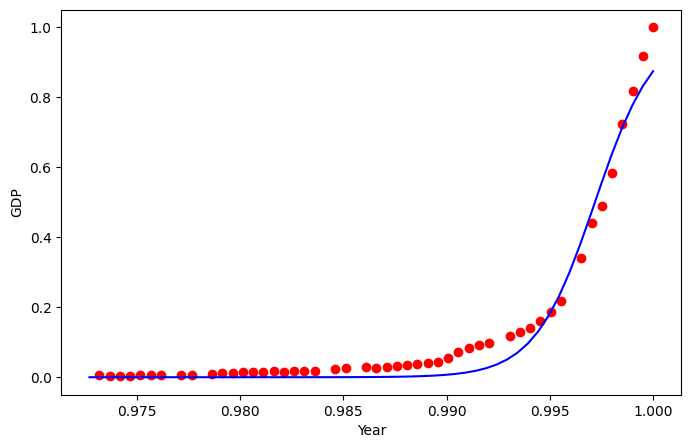

In [16]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8, 5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro')
plt.plot(x, y, 'b-')
plt.ylabel('GDP')
plt.xlabel('Year')

In [66]:
testx = test['Year'] / 2014
testy = test['Value'] / max(df['Value'])
pred = sigmoid(testx, *popt)

In [67]:
from sklearn.metrics import r2_score
r2_score(testy, pred)

0.9838681378032382